# Задание №4.a - Обучение нейросетевых регрессора и классификаторов

Цель работы – получить навыки создания полносвязного бинарного и многоклассового классификаторов, а также нейросетевого регрессора с помощью библиотеки построения нейронных сетей.
Задачи – Построить три нейросетевые модели:

a) Бинарный Классификатор

b) Многоклассовый классификатор

c) Регрессор


Выполнить загрузку и предварительную обработку данных из наборов. Разделить каждую выборку на обучающую, тестовую и валидационную. Произвести обучение набора нейросетевых архитектур, отличающихся разным набором параметров: число слоёв, количество нейронов в слоях, функции активации в слоях, процедур оптимизации:

-	Подобрать архитектуры нейронных сетей, которые с одной стороны позволяют получить модели с лучшими метриками качества работы, с другой стороны не являются избыточными и не переобученными.

-	Вычислить следующие метрики работы:

    1. Для бинарного классификатора: Recall, Precision, Weighted Accuracy, AUC для всех исследованных моделей.

    2. Для многоклассового классификатора: Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе.

    3. Для регрессора: MSE, MAE, R2 для всех полученных моделей.

    4. Сделать выводы по результатам построения моделей.

Описание отчета.
1. Описание наборов данных.
2. Признаки, которые были использованы для анализа.
2. Параметры архитектур и обучения нейронных сетей, использованные для обучения.
3. Графики обучения для архитектур нейронных сетей с лучшими характеристиками эффективности

## Variant - even
a)	Оценка вероятности, того, что клиент откроет банковский депозит в результате маркетинговой акции:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing Класс: атрибут 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no').

b)	Оценка здоровья внутриутробного развития плода: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification Метка класса: fetal_health.

c)	Оценка уровня потребления ресурсов домохозяйством. Набор данных DS_2019_public.csv. Описание атрибутов – файл recs2009_public_codebook.xlsx. Предсказываемый признак – один из атрибутов (использовать только один из): TOTALBTU, TOTALBTUSPH, TOTALBTUCOL, TOTALBTUWTH, TOTALBTURFG, TOTALBTUOTH (Примечание BTU – Британская тепловая единица BTU ≈ 252 калории).


## Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/ml-lab4/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.replace('unknown', np.nan, inplace=True)

In [6]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = df.columns.drop(numeric_features + ['y']).tolist()
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [7]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [8]:
df.isna().any(axis=1).sum()

10700

In [9]:
df[df.isna().any(axis=1)].count()

age               10700
job               10370
marital           10620
education          8969
default            2103
housing            9710
loan               9710
contact           10700
month             10700
day_of_week       10700
duration          10700
campaign          10700
pdays             10700
previous          10700
poutcome          10700
emp.var.rate      10700
cons.price.idx    10700
cons.conf.idx     10700
euribor3m         10700
nr.employed       10700
y                 10700
dtype: int64

Четверть данных имеет пропущенные значения, и находятся они в потенциально значимых колонках. Стоит заполнить числовые значения средним, а категориальные частой категорией.

Для модели классификации нужно числовые значения нормализовать, а категориальные закодировать с помощью one hot encoding

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [11]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [12]:
X = df.drop(columns=['y'], axis=1)
y = df['y']

In [13]:
X_processed = preprocessor.fit_transform(X)

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
models_params = [
    {'layers': [32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'sgd'},
    {'layers': [64], 'activation': 'tanh', 'optimizer': 'adam'}
]

In [16]:
input_dim = X_train.shape[1]
trained_models = []

In [24]:
from modules.ml.a import build_model
from tensorflow.keras.callbacks import EarlyStopping

for params in models_params:
    model = build_model(input_dim, **params)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=0)
    trained_models.append((model, history))

/IdeaProjects/DataAnalysisMethods/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748452554.676402   29278 service.cc:152] XLA service 0x7f9dd00034c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748452554.676443   29278 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-05-28 17:15:54.702291: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748452554.869497   29278 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748452555.193354   29278 device_compiler.h:188] Compiled 

In [25]:
trained_models

[(<Sequential name=sequential_1, built=True>,
  <keras.src.callbacks.history.History at 0x7f9fac915160>),
 (<Sequential name=sequential_2, built=True>,
  <keras.src.callbacks.history.History at 0x7f9f2154f680>),
 (<Sequential name=sequential_3, built=True>,
  <keras.src.callbacks.history.History at 0x7f9edc314e00>),
 (<Sequential name=sequential_4, built=True>,
  <keras.src.callbacks.history.History at 0x7f9ed45ba960>)]

In [31]:
def compute_metrics(model, X, y):
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype(int)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    class_weights = np.bincount(y) / len(y)
    weighted_acc = (recall_score(y, y_pred, pos_label=0) * class_weights[0] +
                    recall_score(y, y_pred, pos_label=1) * class_weights[1])
    auc = roc_auc_score(y, y_pred_prob)
    return precision, recall, weighted_acc, auc


In [32]:
results = []
for i, (model, _) in enumerate(trained_models):
    precision, recall, weighted_acc, auc = compute_metrics(model, X_test, y_test)
    results.append({
        'Model': f'Model {i+1}',
        'Precision': precision,
        'Recall': recall,
        'Weighted Accuracy': weighted_acc,
        'AUC': auc
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AUC', ascending=False))

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
     Model  Precision    Recall  Weighted Accuracy       AUC
2  Model 3   0.636695  0.566486           0.915028  0.941888
3  Model 4   0.651297  0.488649           0.913207  0.941411
1  Model 2   0.655271  0.497297           0.914178  0.940789
0  Model 1   0.643172  0.473514           0.911386  0.940369


In [33]:
top_models = results_df.sort_values(by='AUC', ascending=False).head(2)
top_indices = top_models.index.tolist()
top_models

,Model,Precision,Recall,Weighted Accuracy,AUC
2,Model 3,0.636695,0.566486,0.915028,0.941888
3,Model 4,0.651297,0.488649,0.913207,0.941411


In [34]:
def plot_training_history(model_histories, model_names):
    plt.figure(figsize=(14, 6))

    # График потерь (loss)
    plt.subplot(1, 2, 1)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['loss']) + 1)
        plt.plot(epochs, history.history['loss'], label=f'Train {name}', linestyle='--', linewidth=2)
        plt.plot(epochs, history.history['val_loss'], label=f'Val {name}', linewidth=2)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # График точности (accuracy)
    plt.subplot(1, 2, 2)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['accuracy']) + 1)
        plt.plot(epochs, history.history['accuracy'], label=f'Train {name}', linestyle='--', linewidth=2)
        plt.plot(epochs, history.history['val_accuracy'], label=f'Val {name}', linewidth=2)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

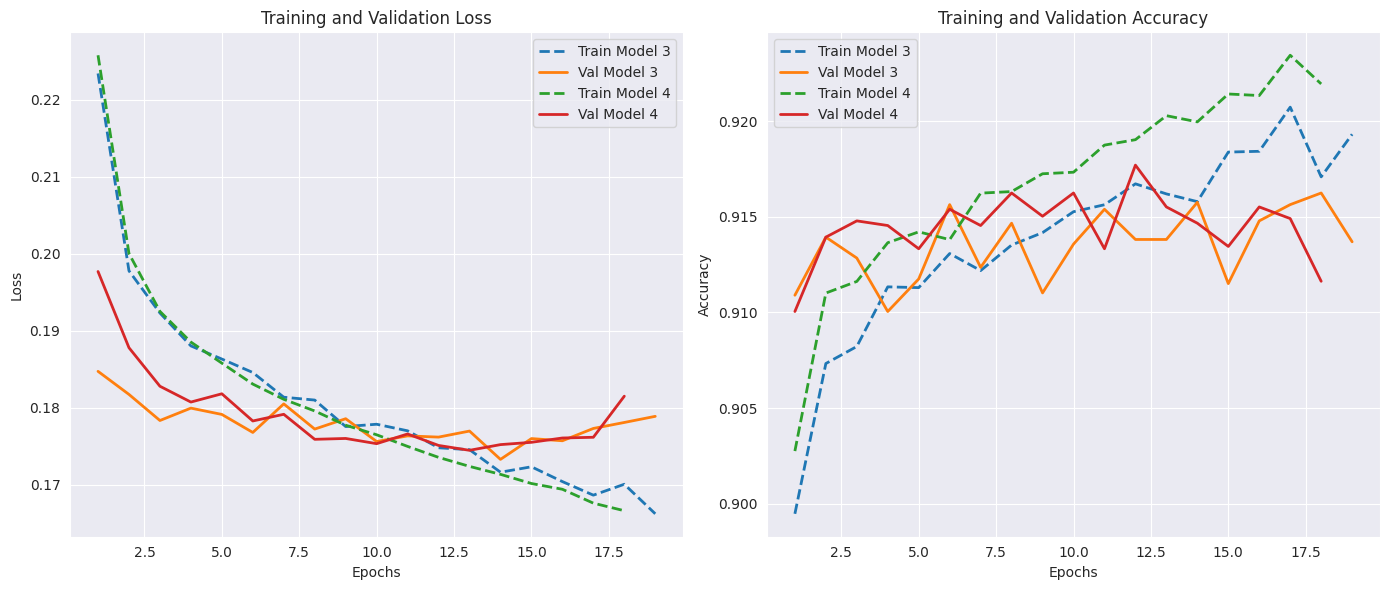

In [35]:
top_histories = [trained_models[i][1] for i in top_indices]
top_names = [f"Model {i+1}" for i in top_indices]

plot_training_history(top_histories, top_names)

In [47]:
top_indices

[2, 3]

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


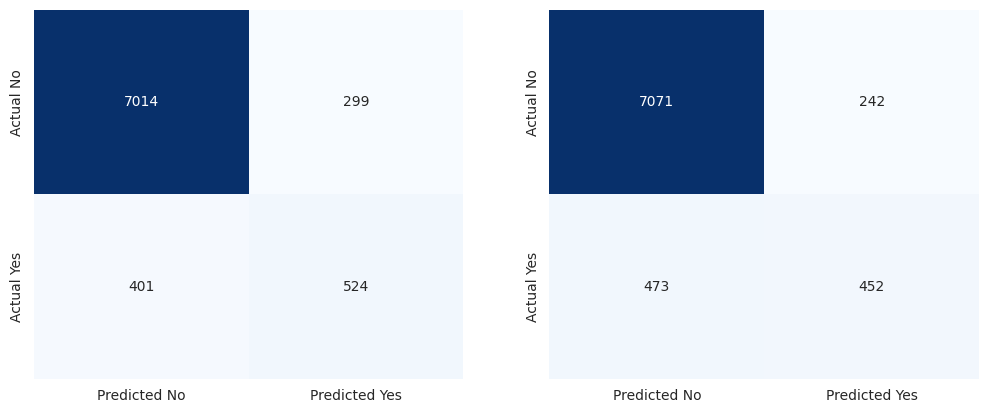

In [46]:
from sklearn.metrics import confusion_matrix

models = [trained_models[i][0] for i in top_indices]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12.2, 4.8))
for i, model in enumerate(models):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Вычисляем матрицу ошибок
    cm = confusion_matrix(y_test, y_pred)

    # Визуализация
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'], ax=axes[i])
plt.show()

In [60]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(model, X_test, y_test, model_name="Модель"):
    y_scores = model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    y_pred = (y_scores > 0.5).astype(int)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc
    }

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2,
             label=f'ROC кривая (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--',
             label='Случайное угадывание')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC-кривая')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

    for i in range(len(thresholds)):
        plt.plot(fpr[i], tpr[i], 'o', markersize=2, alpha=0.7)

    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])

    plt.show()

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC-ROC: {metrics['auc']:.4f}")

    return metrics

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


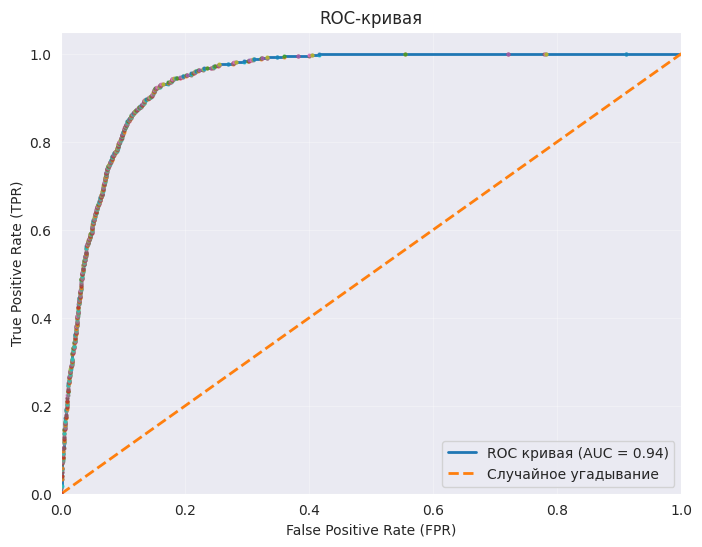

Accuracy: 0.9150
Precision: 0.6367
Recall: 0.5665
F1-score: 0.5995
AUC-ROC: 0.9419


{'accuracy': 0.9150279193979121,
 'precision': 0.6366950182260024,
 'recall': 0.5664864864864865,
 'f1': 0.5995423340961098,
 'auc': 0.9418883070134267}

In [61]:
evaluate_classifier(trained_models[2][0], X_test, y_test, "Idx 2")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


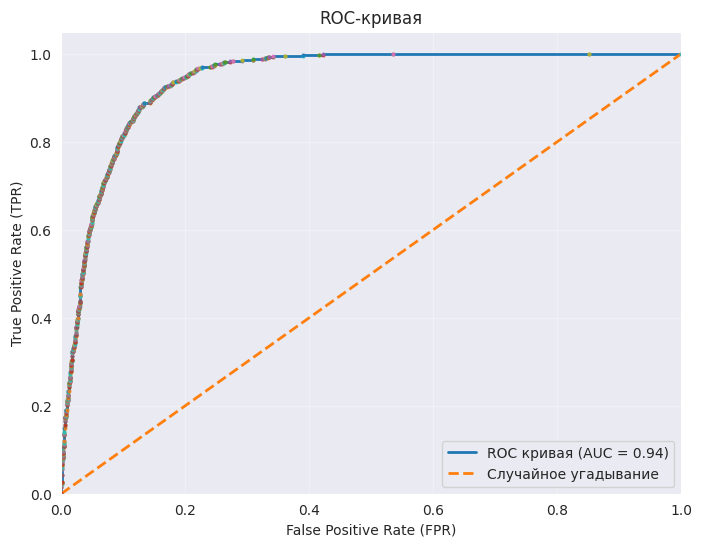

Accuracy: 0.9132
Precision: 0.6513
Recall: 0.4886
F1-score: 0.5584
AUC-ROC: 0.9414


{'accuracy': 0.9132070890992959,
 'precision': 0.6512968299711815,
 'recall': 0.48864864864864865,
 'f1': 0.5583693638048178,
 'auc': 0.9414108159848622}

In [62]:
evaluate_classifier(trained_models[3][0], X_test, y_test, "Idx 2")

In [50]:
models_params[2]

{'layers': [128, 64, 32], 'activation': 'relu', 'optimizer': 'sgd'}

Mодель с такими параметрами имеет лучший результат